## test bilinear sampling

In [14]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

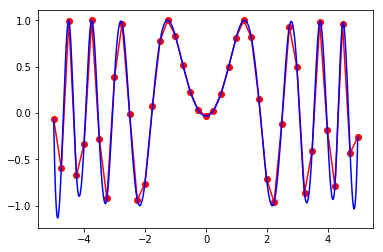

In [15]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

## test gaussian kernel

In [2]:
import os
import sys
# add your module path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# change your base path
os.chdir('../')
print(os.getcwd())

/home/yoyee/Documents/deepSfm


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a:  [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


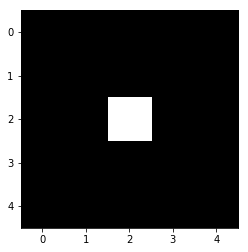

a_filtered:  [[0.03989173 0.0399667  0.04001229 0.0399667  0.03989173]
 [0.0399667  0.0400418  0.04008748 0.0400418  0.0399667 ]
 [0.04001229 0.04008748 0.0401332  0.04008748 0.04001229]
 [0.0399667  0.0400418  0.04008748 0.0400418  0.0399667 ]
 [0.03989173 0.0399667  0.04001229 0.0399667  0.03989173]]


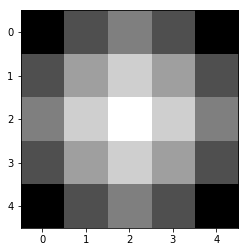

In [13]:
from scipy.ndimage import gaussian_filter
a = np.arange(50, step=2).reshape((5,5))
a = np.zeros((5,5))
a[2,2] = 1
print("a: ", a)
plt.imshow(a)
plt.show()

a_filtered = gaussian_filter(a, sigma=3)
print("a_filtered: ", a_filtered)
plt.imshow(a_filtered)
plt.show()

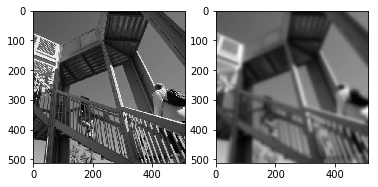

In [7]:
from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = gaussian_filter(ascent, sigma=5)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

## extropolate points

In [21]:
import torch
def extrapolate_points(pnts):
    pnts_int = pnts.long().type(torch.FloatTensor)
    pnts_x, pnts_y = pnts_int[:,0], pnts_int[:,1]

    stack_1 = lambda x, y: torch.stack((x, y), dim=1)
    pnts_ext = torch.cat((pnts_int, stack_1(pnts_x, pnts_y+1),
        stack_1(pnts_x+1, pnts_y), pnts_int+1), dim=0)

    pnts_res = pnts - pnts_int # (x, y)
    x_res, y_res = pnts_res[:,0], pnts_res[:,1] # residuals
    res_ext = torch.cat(((1-x_res)*(1-y_res), (1-x_res)*y_res, 
            x_res*(1-y_res), x_res*y_res), dim=0)
    return pnts_ext, res_ext

In [25]:
import torch
# pnts = torch.tensor([[1.5, 1.5],[2.2, 2.4]])
pnts = torch.tensor([[2.2, 2.4]])
pnts_ext, res_ext = extrapolate_points(pnts)
print("pnts_ext: ", pnts_ext)
print("res_ext: ", res_ext)
# torch.cat()

pnts_ext:  tensor([[2., 2.],
        [2., 3.],
        [3., 2.],
        [3., 3.]])
res_ext:  tensor([0.4800, 0.3200, 0.1200, 0.0800])


## gaussian augmentation

images: (2, 5, 5, 1)
images_aug[0].squeeze()  [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


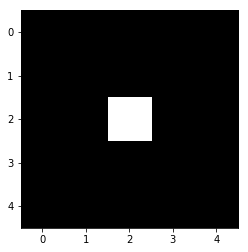

In [56]:
import numpy as np
import imgaug.augmenters as iaa
from imgaug import parameters as iap

images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
images = np.zeros((2,5,5,1), dtype=np.uint8)
images[:,2,2] = 255
seq = iaa.Sequential([iaa.GaussianBlur((3.0))])

# images_aug = seq(images)
# images_aug = iaa.GaussianBlur(3.0)(images=images)

# Show an image with 8*8 augmented versions of image 0 and 8*8 augmented
# versions of image 1. Identical augmentations will be applied to
# image 0 and 1.
# seq.show_grid([images[0], images[1]], cols=8, rows=8)

blurer = iaa.GaussianBlur(sigma=0.2)
images_aug = blurer.augment_images(images)
print("images:", images.shape)
plt.imshow(images_aug[0].squeeze())
print("images_aug[0].squeeze() ", images_aug[0].squeeze())

In [36]:
from imgaug import augmenters as iaa
import numpy as np


images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)

# always horizontally flip each input image
images_aug = iaa.Fliplr(1.0)(images=images)

# vertically flip each input image with 90% probability
images_aug = iaa.Flipud(0.9)(images=images)

# blur image 2 by a sigma of 3.0
images_aug = iaa.GaussianBlur(3.0)(images=images)

# move each input image by 8 to 16px to the left
images_aug = iaa.Affine(translate_px={"x": (-8, -16)})(images=images)

TypeError: 'Fliplr' object is not callable